<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning-projects/blob/master/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, SubsetRandomSampler

import matplotlib.pyplot as plt
import numpy as np

In [21]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

In [46]:
'''
Split data into train-validation sets
1. Create a list of indices
2. Shuffle the indices
3. Split the indices based on train-val percentage
4. Create SubsetRandomSampler
'''
val_size = 0.2

num_idx = len(trainset)
indices = list(range(num_idx))
np.random.shuffle(indices)

val_size = int(val_size * num_idx)
train_idx , val_idx = indices[val_size:], indices[:val_size]

train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(val_idx)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
validloader = DataLoader(trainset, batch_size=64, sampler=validation_sampler)
testloader = DataLoader(testset, batch_size=64)

The shape of images: torch.Size([64, 1, 28, 28])
 The shape of labels: torch.Size([64])


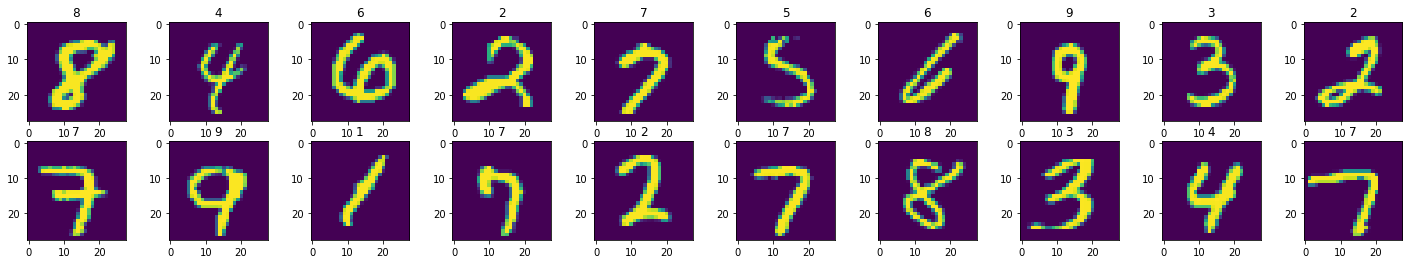

In [29]:
images, labels = next(iter(trainloader))

print(f"The shape of images: {images.shape}\n The shape of labels: {labels.shape}")

fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1)
  ax.imshow(images[idx].numpy().squeeze())
  ax.set_title(str(labels[idx].item()))

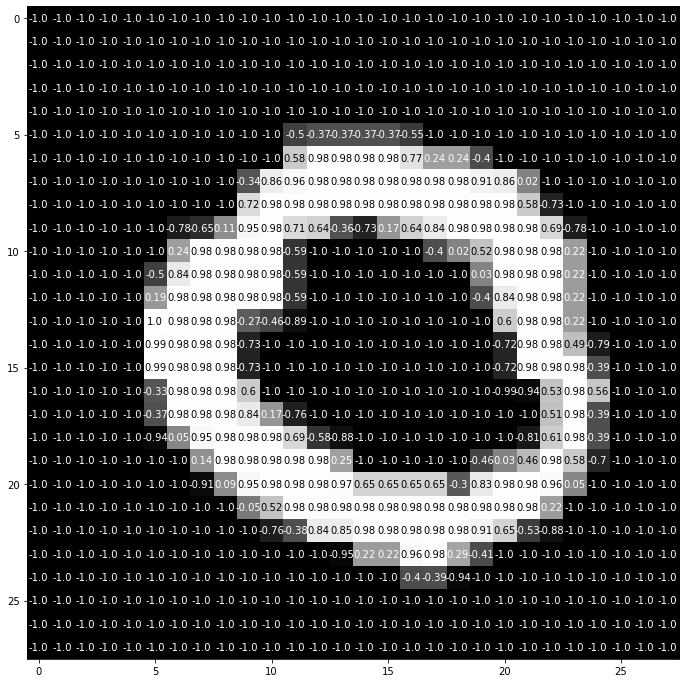

In [25]:
#View an image in more details
img = images[2].numpy().squeeze()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val),xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

In [26]:
n_input = 784
n_hidden1 = 128
n_hidden2 = 64
n_out = 10
model = nn.Sequential(nn.Linear(n_input, n_hidden1), 
                    nn.ReLU(),
                    nn.Linear(n_hidden1, n_hidden2),
                    nn.ReLU(),
                    nn.Linear(n_hidden2,n_out),
                    nn.LogSoftmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [40]:
epochs = 5
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1
        images = images.view(images.shape[0], -1)
        # Clear out any gradient calculation that pytorch has accumulated
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        # Update the weights
        optimizer.step()
        running_loss += loss.item()

        if steps % 100 == 0:
          val_loss = 0
          for images_val, labels_val in validloader:
            images_val = images_val.view(images_val.shape[0],-1)
            model.eval()
            output = model.forward(images_val)
            loss = criterion(output, labels_val)
            val_loss += loss.item()
          print(f"epochs:{e}/{steps}.. validation loss: {val_loss/len(validloader):.3f}")
          model.train()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

epochs:0/100.. validation loss: 1.788
epochs:0/200.. validation loss: 1.629
epochs:0/300.. validation loss: 1.462
epochs:0/400.. validation loss: 1.300
epochs:0/500.. validation loss: 1.153
epochs:0/600.. validation loss: 1.027
epochs:0/700.. validation loss: 0.927
Training loss : 1.363770600716273
epochs:1/800.. validation loss: 0.842
epochs:1/900.. validation loss: 0.776
epochs:1/1000.. validation loss: 0.720
epochs:1/1100.. validation loss: 0.675
epochs:1/1200.. validation loss: 0.638
epochs:1/1300.. validation loss: 0.605
epochs:1/1400.. validation loss: 0.579
epochs:1/1500.. validation loss: 0.554
Training loss : 0.6881414105494817
epochs:2/1600.. validation loss: 0.535
epochs:2/1700.. validation loss: 0.518
epochs:2/1800.. validation loss: 0.502
epochs:2/1900.. validation loss: 0.487
epochs:2/2000.. validation loss: 0.476
epochs:2/2100.. validation loss: 0.466
epochs:2/2200.. validation loss: 0.455
Training loss : 0.5029266944328944
epochs:3/2300.. validation loss: 0.450
epochs:3

In [56]:
images, labels = next(iter(testloader))

img = images[1].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.log_softmax(logits, dim=1)
print(ps)
top_k, top_class = ps.topk(1, dim=1)
print(f"The predicted value is: {top_class.item()}")
print(f"The real value is: {labels[1].item()}")

tensor([[ -4.9243,  -8.5221,  -0.1884,  -3.8151, -13.7433,  -4.7485,  -2.0643,
         -16.4267,  -5.0134, -13.7051]])
The predicted value is: 2
The real value is: 2


Text(0.5, 1.0, 'The model predicts the selected digit as 8')

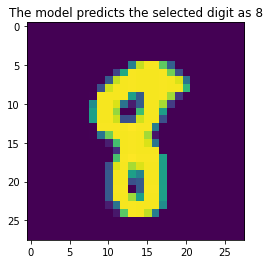

In [42]:
plt.imshow(images[1].squeeze().numpy())
plt.title(f"The model predicts the selected digit as {torch.argmax(ps)}")